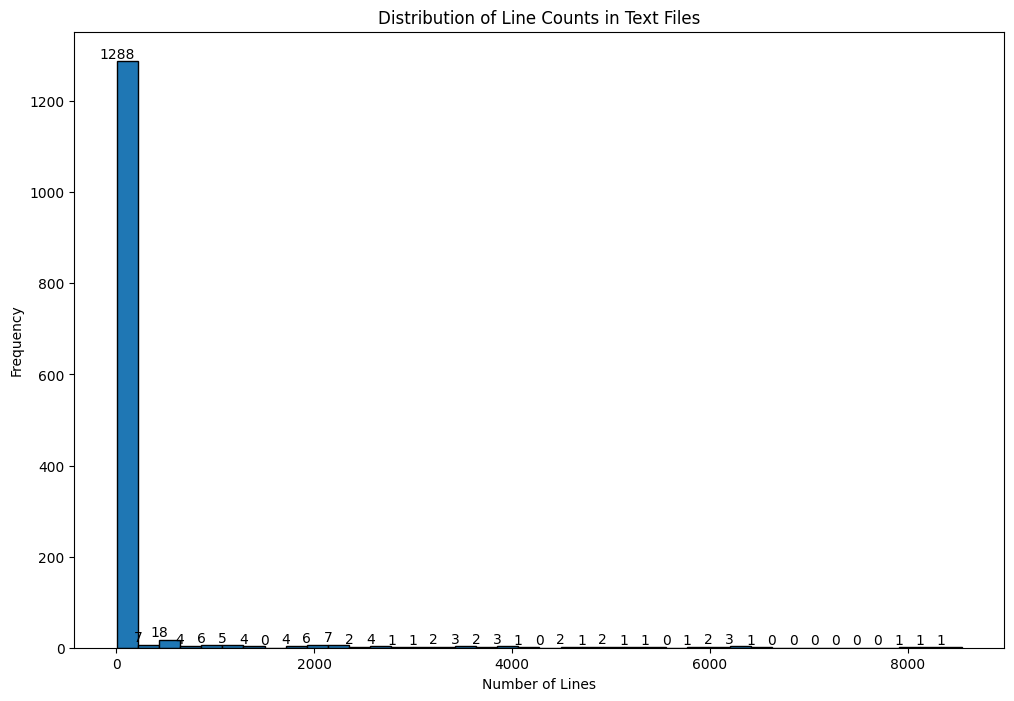

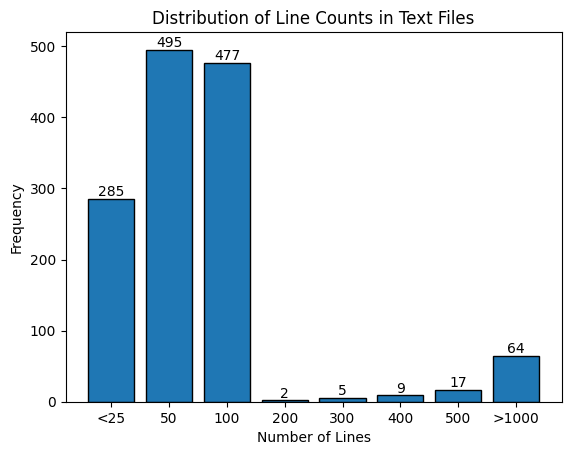

In [17]:
import matplotlib.pyplot as plt
import numpy as np

def read_line_counts(filename):
    line_counts = []
    with open(filename, 'r') as file:
        for line in file:
            count, _ = line.split(maxsplit=1)
            line_counts.append(int(count))
    return line_counts

def plot_distribution(line_counts):
    n, bins, patches = plt.hist(line_counts, bins=40, edgecolor='black')
    
    #change plot size
    fig = plt.gcf()
    fig.set_size_inches(12, 8)
    
    for count, bin in zip(n, bins):
        plt.text(bin, count, str(int(count)), ha='center', va='bottom')

    plt.title('Distribution of Line Counts in Text Files')
    plt.xlabel('Number of Lines')
    plt.ylabel('Frequency')
    plt.show()

def plot_distribution_customize(line_counts):
    bin_ranges = [25, 50, 100, 200, 300, 400, 500, 1000, max(line_counts)+1]
    bin_labels = ['<25', '50', '100', '200', '300', '400', '500', '>1000']

    counts, _ = np.histogram(line_counts, bins=bin_ranges)

    plt.bar(bin_labels, counts, edgecolor='black')

    for label, count in zip(bin_labels, counts):
        plt.text(label, count, str(count), ha='center', va='bottom')

    plt.title('Distribution of Line Counts in Text Files')
    plt.xlabel('Number of Lines')
    plt.ylabel('Frequency')
    plt.show()

if __name__ == "__main__":
    counts = read_line_counts("line_counts.txt")
    plot_distribution(counts)
    plot_distribution_customize(counts)


In [23]:
import pandas as pd


data = pd.read_csv('/Users/guozhitong/11711-webarena/gpt3.5_baseline_metadata.csv', index_col=0)
data.columns

Index(['sites', 'task_id', 'require_login', 'storage_state', 'start_url',
       'geolocation', 'intent_template', 'instantiation_dict', 'intent',
       'require_reset', 'eval', 'intent_template_id', 'string_note', 'result'],
      dtype='object')

In [35]:
data = pd.read_csv('/Users/guozhitong/11711-webarena/gpt3.5_baseline_metadata.csv', index_col=0)

sites = ["['shopping_admin']", "['map']", "['shopping']", "['reddit']", "['gitlab']"] # only select non-cross-site intents

filtered_data = data[data['sites'].isin(sites) & (data['result'] == 'FAIL')]

sampled_data = filtered_data.groupby('intent_template_id').apply(
    lambda x: x.sample(n=1)
).reset_index(drop=True)

if len(sampled_data) < 100:
    additional_samples = 100 - len(sampled_data)
    sampled_data = pd.concat([
        sampled_data,
        filtered_data[~filtered_data.index.isin(sampled_data.index)].sample(n=additional_samples)
    ])


In [42]:
task_list = sorted(sampled_data['task_id'].to_list())

with open('task_list.txt', 'w') as f:
    for item in task_list:
        f.write("%s\n" % item)